<a href="https://colab.research.google.com/github/devinaadinda/German-Credit-Risk/blob/master/Prediksi_Resiko_Kredit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!wget -O German_CreditData.csv https://raw.githubusercontent.com/devinaadinda/German-Credit-Risk/master/German_CreditData.csv

--2019-11-23 11:41:37--  https://raw.githubusercontent.com/devinaadinda/German-Credit-Risk/master/German_CreditData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54394 (53K) [text/plain]
Saving to: ‘German_CreditData.csv’

German_CreditData.c 100%[===================>]  53.12K  --.-KB/s    in 0.008s  

2019-11-23 11:41:37 (6.69 MB/s) - ‘German_CreditData.csv’ saved [54394/54394]



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings                       # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 


def annot_plot_num(ax,w,h):              # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h)) 

def annot_plot(ax,w,h):                  # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10), textcoords='offset points')

In [24]:
df = pd.read_csv("German_CreditData.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [25]:
df.rename(columns=lambda x:x.replace('Unnamed: 0','id'), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
id                  1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [0]:
df['Checking account'].fillna('no-info', inplace = True)
df['Saving accounts'].fillna('no-info', inplace = True)

**EDA (Exploratory Data Analysis)**

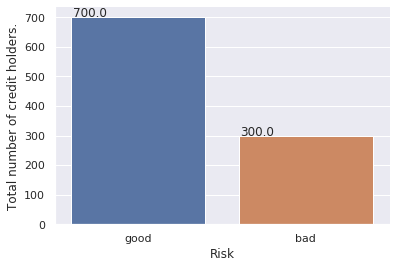

In [27]:
ax = sns.countplot('Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

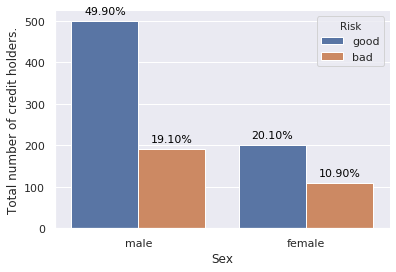

In [28]:
ax = sns.countplot('Sex',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.008,1)
plt.show()

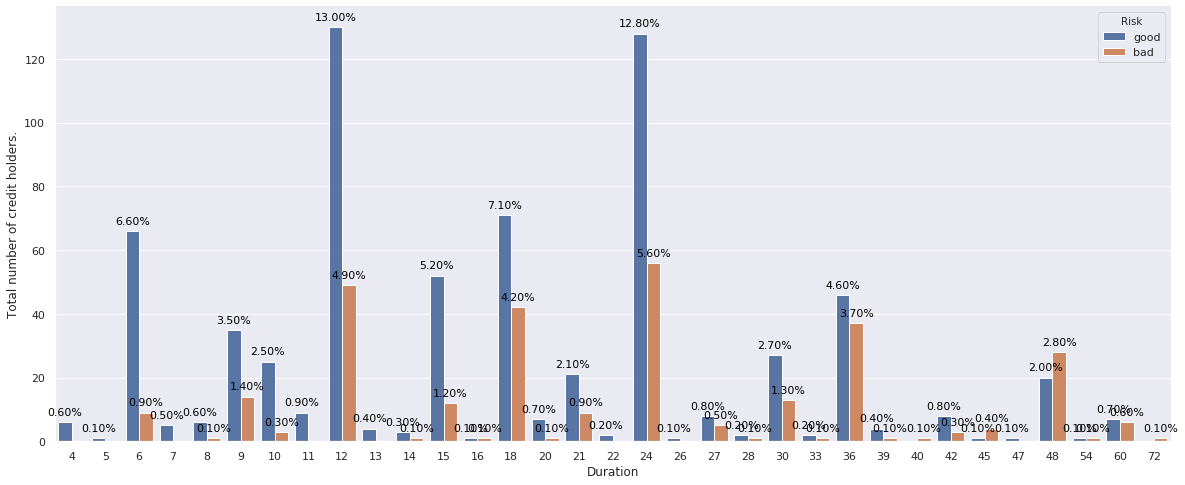

In [29]:
plt.figure(figsize=(20,8))
ax = sns.countplot('Duration',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.008,1)
plt.show()

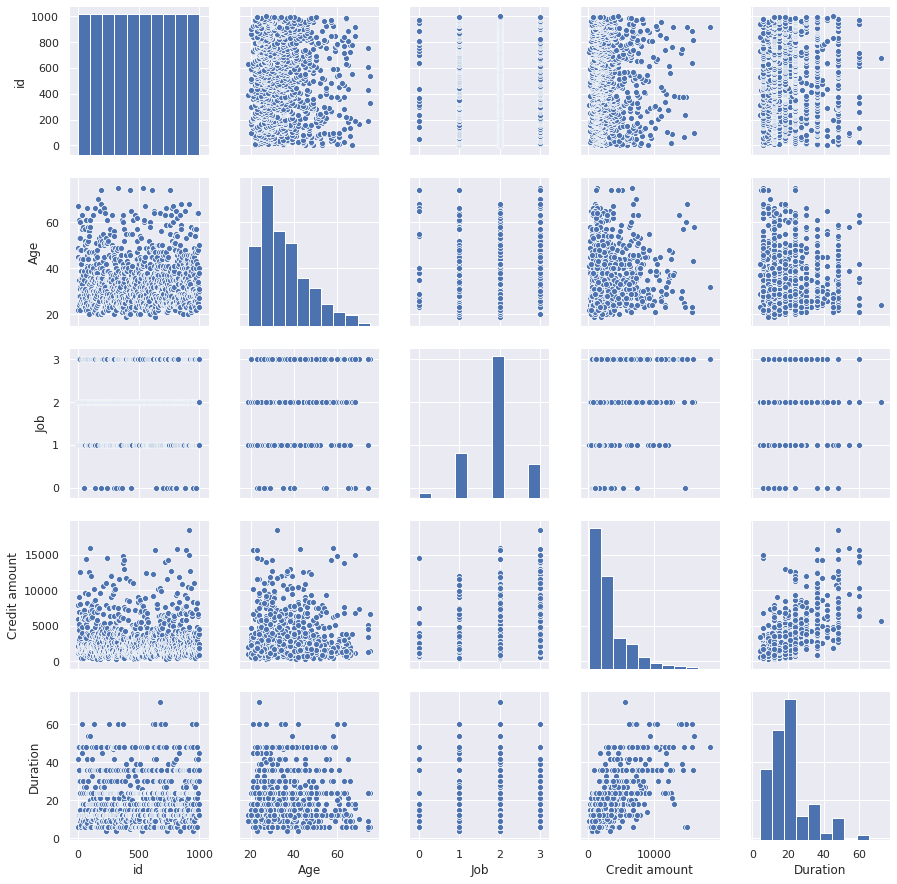

In [30]:
sns.pairplot(data = df)
plt.show()

#**Preprocess Dataset**

mengubah nilai data kategorikal menjadi numerik

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df.head(2)

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,2,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0


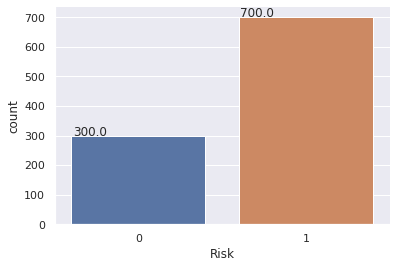

In [42]:
ax = sns.countplot('Risk', data = df)
annot_plot_num(ax, 0.008, 1)
plt.show()

**Korelasi Data**

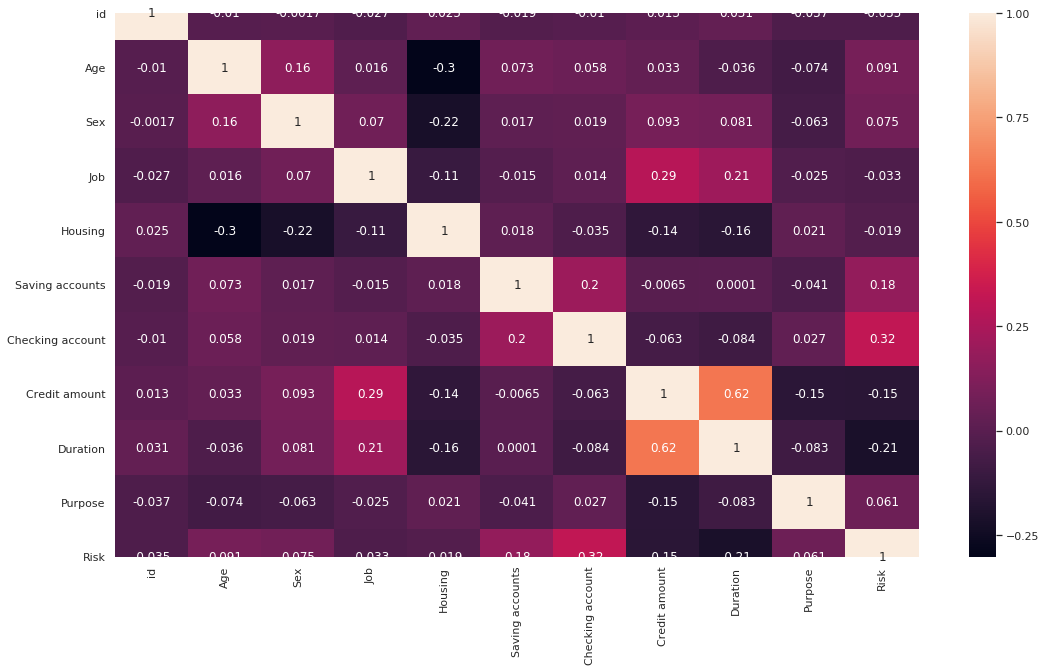

In [47]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

**PCA (principal component analysis)**

In [0]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
x = df.loc[:,features].values
y = df.loc[:,['Risk']].values #target var

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x) #standarisasi data

In [51]:
pd.DataFrame(data = X, columns = features).head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,0.670280,0.146949,-0.133710,0.955847,-1.344000,-0.745131,-1.236478,1.073263
1,-1.191404,-1.491914,0.146949,-0.133710,-0.706496,-0.265348,0.949817,2.248194,1.073263
2,1.183312,0.670280,-1.383771,-0.133710,-0.706496,0.813303,-0.416562,-0.738668,0.061705
3,0.831502,0.670280,0.146949,-2.016956,-0.706496,-1.344000,1.634247,1.750384,0.567484
4,1.535122,0.670280,0.146949,-2.016956,-0.706496,-1.344000,0.566664,0.256953,-0.949853


Select the Dependent (target) and Independent Variables

In [0]:
#buat variabel x dan y
y = df['Risk']
X = df.drop(['Risk','id'], axis = 1)

#Split dataset menjadi versi train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [56]:
y_test.value_counts()

1    141
0     59
Name: Risk, dtype: int64

#**MODEL**

**Random Forest Classifier**

choose the best estimator and parameters : GridSearchCV

In [60]:
#check param yg cocok u/ random forest classification.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42], 'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
{'max_depth': 10, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 1}


In [61]:
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train,y_train)
rfc_clf_pred = rfc_clf.predict(X_test)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test))

#make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train,y_train,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.76
Confusion Matrix: [ 24  13  35 128]
Classification report:
              precision    recall  f1-score   support

           0       0.41      0.65      0.50        37
           1       0.91      0.79      0.84       163

    accuracy                           0.76       200
   macro avg       0.66      0.72      0.67       200
weighted avg       0.82      0.76      0.78       200

cross val score: 0.7388201281450227


**Support Vector Classifier**

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}
svc_clf = SVC(random_state=42)
grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

SVC(C=0.95, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)
{'C': 0.95, 'degree': 3, 'kernel': 'rbf'}


In [63]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)

print('Accuracy:',accuracy_score(svc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(svc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test))

score_svc = cross_val_score(svc_clf,X_train,y_train, cv = 10).mean()
print('cross val score:', score_svc)

Accuracy: 0.76
Confusion Matrix: [[ 17   6]
 [ 42 135]]
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.74      0.41        23
           1       0.96      0.76      0.85       177

    accuracy                           0.76       200
   macro avg       0.62      0.75      0.63       200
weighted avg       0.88      0.76      0.80       200

cross val score: 0.7375543053602126


**Logistic Regresion**

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('Accuracy:',accuracy_score(lr_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(lr_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(lr_pred,y_test))

score_lr = cross_val_score(lr,X_train,y_train,cv=10).mean()
print('cross val score:', score_lr)

Accuracy: 0.77
Confusion Matrix: [[ 22   9]
 [ 37 132]]
Classification report:
              precision    recall  f1-score   support

           0       0.37      0.71      0.49        31
           1       0.94      0.78      0.85       169

    accuracy                           0.77       200
   macro avg       0.65      0.75      0.67       200
weighted avg       0.85      0.77      0.80       200

cross val score: 0.7175693467729334


**Gradient Boosting Classifier**

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

print('Accuracy:',accuracy_score(gbc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(gbc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(gbc_pred,y_test))

score_gbc = cross_val_score(gbc,X_train,y_train, scoring='accuracy', cv = 10).mean()
print('cross val score:', score_gbc)

Accuracy: 0.755
Confusion Matrix: [[ 23  13]
 [ 36 128]]
Classification report:
              precision    recall  f1-score   support

           0       0.39      0.64      0.48        36
           1       0.91      0.78      0.84       164

    accuracy                           0.76       200
   macro avg       0.65      0.71      0.66       200
weighted avg       0.81      0.76      0.78       200

cross val score: 0.7301476793248944


In [68]:
models = pd.DataFrame({'Models':['Random Forest Classifier', 'Support Vector Classifier', 'Logistic Regression', 'Gradient Boost Classifier'],'Score':[score_rfc ,score_svc, score_lr, score_gbc]})
models.sort_values(by='Score', ascending = False)

,Models,Score
0,Random Forest Classifier,0.738820
1,Support Vector Classifier,0.737554
3,Gradient Boost Classifier,0.730148
2,Logistic Regression,0.717569


**ROC, AUC**

ROC : untuk mempermudah identifikasi best threshold

AUC : untuk membantu kategorikan metode yg lebih baik 

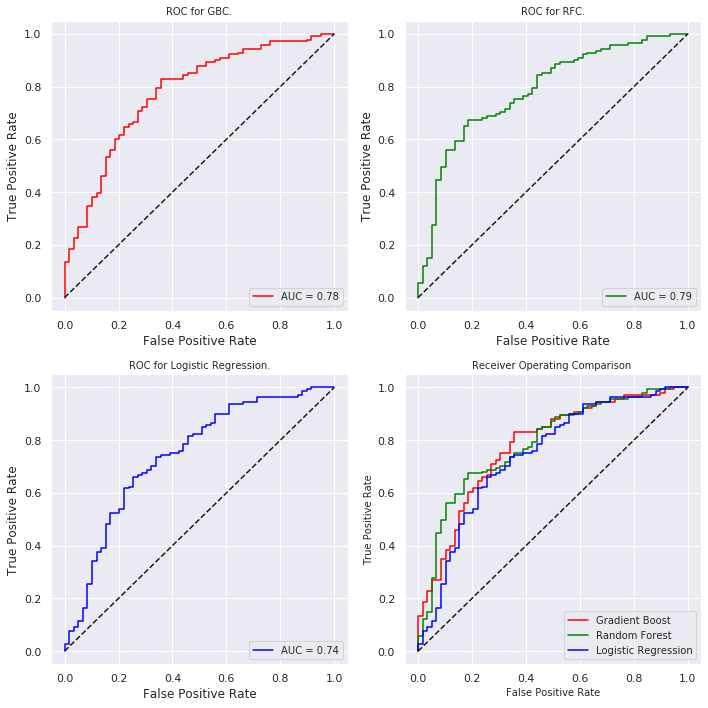

In [110]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

from sklearn import metrics

#gbc
gbc_prob = gbc.predict_proba(X_test)[:,1]
fprgbc, tprgbc, thresholdsgbc = metrics.roc_curve(y_test, gbc_prob)
roc_auc_gbc = metrics.auc(fprgbc,tprgbc)
ax_arr[0,0].plot(fprgbc, tprgbc,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for GBC.', fontsize = 10)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

#Random forest
rfc_prob = rfc_clf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,1].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for RFC.', fontsize = 10)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

#Logistic Regression
lr_prob = lr.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,0].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for Logistic Regression.', fontsize = 10)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

#For All
ax_arr[1,1].plot(fprgbc,tprgbc, label ='Gradient Boost', color = 'red')
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()